# Visulaizing the .edf Files of the dataset

### **Includes**
1. Plotting the EEG data
2. Correlation Matrix

**importing the libraries and loading in the dataset**

Chosen to load the first sentence of `t12.2022.04.28.mat`

In [2]:
import mne
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


raw = mne.io.read_raw_edf("./processed_data/t12.2022.04.28.mat/trial_0.edf", preload=True)

print(raw.info)

Extracting EDF parameters from /Users/alejandro/VSCodeProjects/Data-Collection/processed_data_edf/t12.2022.04.28.mat/trial_0.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 349  =      0.000 ...     6.980 secs...
<Info | 8 non-empty values
 bads: []
 ch_names: AF3, AF4, F3
 chs: 3 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 25.0 Hz
 meas_date: 1985-01-01 00:00:00 UTC
 nchan: 3
 projs: []
 sfreq: 50.0 Hz
 subject_info: <subject_info | his_id: X, sex: 0, last_name: X>
>


## **Plotting the EEG signal as a plot**

* Since only 3 channels are extracted for testing, need to change the variable `n_channels` to corresponding value if changed
* `duration` displays a 5-second window of EEG data at a time in the interactive plot (a new window should pop up when running this, that is the interactive plot)

Using matplotlib as 2D backend.


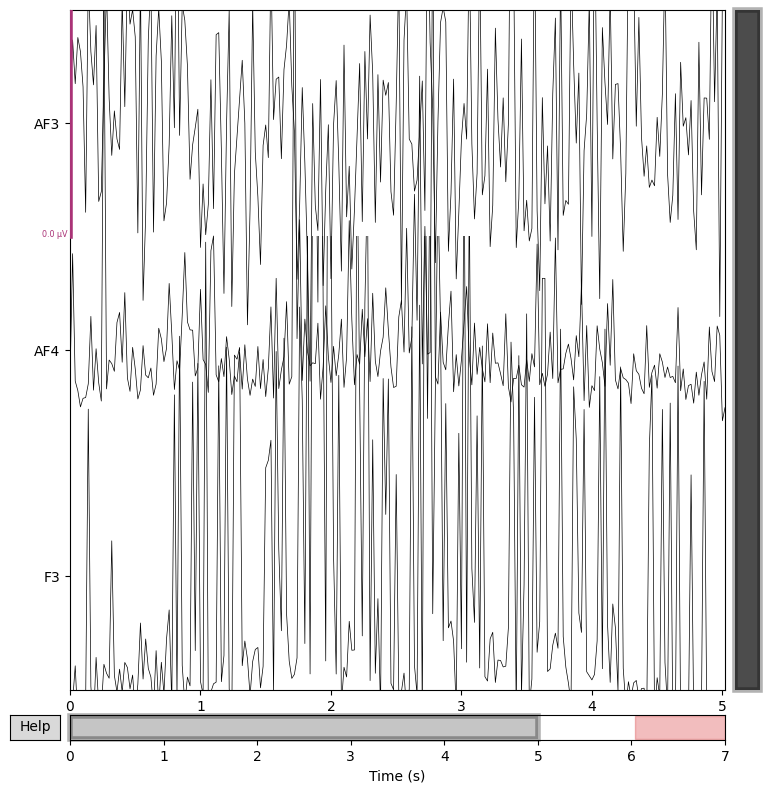

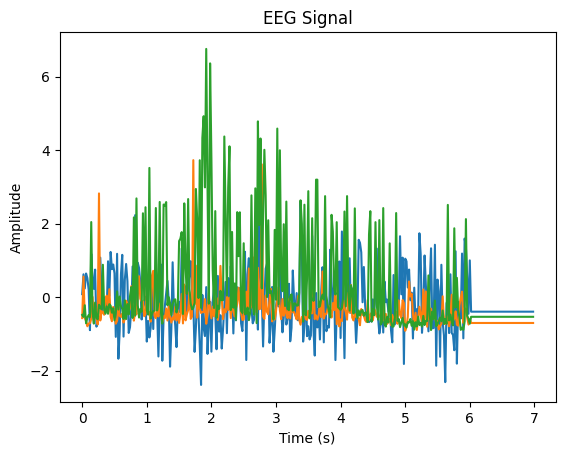

In [3]:
raw.plot(n_channels=3, duration=5, scalings='auto') 

data, times = raw[:3, :]  

plt.plot(times, data.T)
plt.title("EEG Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

## **Generates the correlation matrix**


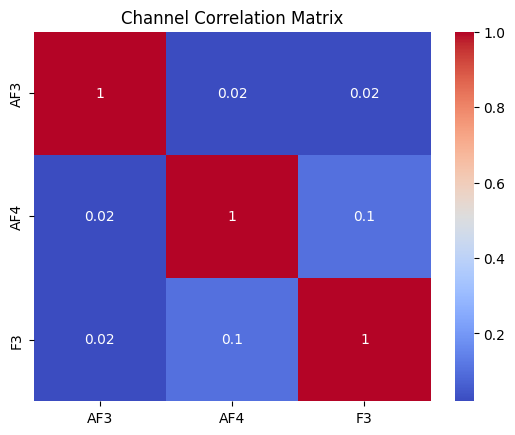

In [4]:

data = raw.get_data()  # shape: (n_channels, n_times)

correlation_matrix = np.corrcoef(data)

sns.heatmap(correlation_matrix, xticklabels=raw.ch_names, yticklabels=raw.ch_names, annot=True, cmap='coolwarm')
plt.title("Channel Correlation Matrix")
plt.show()

In [5]:
raw.to_data_frame()

,time,AF3,AF4,F3
0,0.00,83918.466155,-568927.506775,-481704.605304
1,0.02,623584.002136,561062.626362,-534736.129398
2,0.04,237988.999313,-563484.797723,-218919.447752
3,0.06,645773.508271,-647218.783135,-708205.035844
4,0.08,521149.426649,-790962.124760,-555669.625752
...,...,...,...,...
345,6.90,-393365.250694,-701087.647084,-533061.449690
346,6.92,-393365.250694,-701087.647084,-533061.449690
347,6.94,-393365.250694,-701087.647084,-533061.449690
348,6.96,-393365.250694,-701087.647084,-533061.449690
